## Resolvendo o labirinto com Q-Learning

### Implementando o Q-Learning

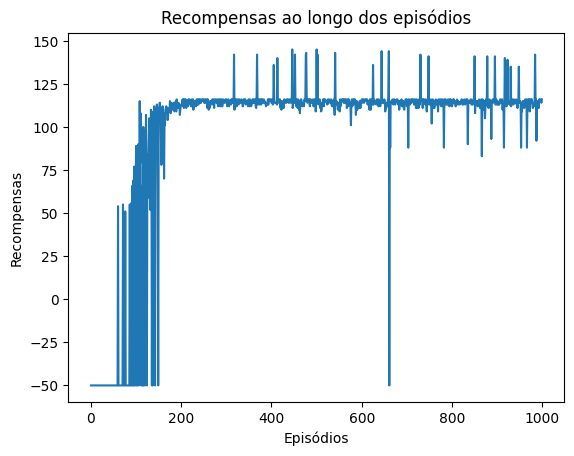

O melhor episódio foi o episódio 446 com a recompensa: 145


In [15]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Parâmetros do labirinto
GRID_SIZE = 10
ACTIONS = ['up', 'down', 'left', 'right']
ALPHA = 0.1  # Taxa de aprendizado
GAMMA = 0.9  # Fator de desconto
EPSILON = 0.1  # Probabilidade de explorar ações aleatórias

# Recompensas do jogo
PONT_MIN = -50
DIAMANTE = 30
CHEGADA = 100
TENTATIVA = -1

# Labirinto mestre (True = caminho, False = parede)
labirinto_mestre = [
    [False, True, True, True, True, False, False, True, False, True],
    [True, True, False, True, False, True, True, True, True, True],
    [True, False, True, True, False, True, False, False, True, False],
    [True, True, False, True, True, True, False, False, True, False],
    [False, True, True, True, False, True, False, False, True, True],
    [True, True, False, True, False, True, True, True, True, True],
    [True, False, False, False, False, True, False, True, False, True],
    [True, False, True, True, True, True, False, True, False, False],
    [True, False, False, True, False, True, True, True, True, True],
    [True, True, True, True, True, True, False, False, False, True],
    ]

# Recompensas no labirinto
recompensas_iniciais = [(0, 4), (0, 9), (6, 5), (9, 9)]
objetivo = (7, 2)

# Inicializar a Q-Table
q_table = np.zeros((GRID_SIZE, GRID_SIZE, len(ACTIONS)))

# Função para escolher uma ação (com exploração ou exploração)
def escolher_acao(estado):
    if random.uniform(0, 1) < EPSILON:  # Exploração
        return random.choice(ACTIONS)
    else:  # Exploração (escolher a melhor ação)
        x, y = estado
        return ACTIONS[np.argmax(q_table[x, y])]

# Função para executar a ação e mover o jogador
def mover(jogador, acao):
    i, j = jogador
    
    if acao == 'up':
        nova_pos = (i - 1, j) if i > 0 else jogador
    elif acao == 'down':
        nova_pos = (i + 1, j) if i < GRID_SIZE - 1 else jogador
    elif acao == 'left':
        nova_pos = (i, j - 1) if j > 0 else jogador
    elif acao == 'right':
        nova_pos = (i, j + 1) if j < GRID_SIZE - 1 else jogador
    else:
        nova_pos = jogador  # Nenhuma ação válida, fica na mesma posição

    # Verificar se a nova posição é válida (não é uma parede)
    if labirinto_mestre[nova_pos[0]][nova_pos[1]]:
        return nova_pos  # Retorna a nova posição se for um caminho
    else:
        return jogador  # Fica na mesma posição se for uma parede


# Função para calcular a recompensa ao mover-se para um novo estado
def calcular_recompensa(nova_pos, recompensas):
    if not labirinto_mestre[nova_pos[0]][nova_pos[1]]:  # Se for parede
        return TENTATIVA
    if nova_pos == objetivo:  # Se alcançar o objetivo
        return CHEGADA
    if nova_pos in recompensas:  # Se pegar uma recompensa
        recompensas.remove(nova_pos)
        return DIAMANTE
    return TENTATIVA  # Movimentos comuns perdem 1 ponto

# Treinamento com Q-Learning
def treinar(episodios=1000):
    recompensas_episodios = []
    melhor_recompensa = -float('inf')
    melhor_episodio = None
    
    
    for ep in range(episodios):
        jogador = (1, 0)  # Posição inicial do jogador
        recompensas = recompensas_iniciais.copy()
        total_recompensa = 0
        rodando = True
        
        while rodando:
            # Escolher ação
            acao = escolher_acao(jogador)
            
            # Mover jogador
            nova_pos = mover(jogador, acao)
            
            # Calcular recompensa
            recompensa = calcular_recompensa(nova_pos, recompensas)
            total_recompensa += recompensa
            
            # Atualizar Q-Table
            estado_atual = jogador
            estado_futuro = nova_pos
            i, j = estado_atual
            ni, nj = estado_futuro
            a = ACTIONS.index(acao)
            q_atual = q_table[i, j, a]
            q_futuro = max(q_table[ni, nj])
            
            # Fórmula de atualização
            q_table[i, j, a] = q_atual + ALPHA * (recompensa + GAMMA * q_futuro - q_atual)
            
            # Mover para o próximo estado
            jogador = nova_pos
            
            # Condição de término
            if jogador == objetivo or total_recompensa <= PONT_MIN:
                rodando = False
        
        # Armazenar recompensa do episódio
        recompensas_episodios.append(total_recompensa)
        
        # Verificar se esse episódio é o melhor até agora
        if total_recompensa > melhor_recompensa:
            melhor_recompensa = total_recompensa
            melhor_episodio = ep
    
    return recompensas_episodios, melhor_episodio

# Rodar o treinamento
episodios = 1000
recompensas_episodios, melhor_episodio = treinar(episodios)

# Plotar recompensas ao longo dos episódios
plt.plot(recompensas_episodios)
plt.xlabel('Episódios')
plt.ylabel('Recompensas')
plt.title('Recompensas ao longo dos episódios')
plt.show()

print(f"O melhor episódio foi o episódio {melhor_episodio} com a recompensa: {recompensas_episodios[melhor_episodio]}")


### Usando o Pygame para ver o que acontece na melhor tentativa
#### (episódio que obteve a melhor recompensa)

In [16]:
import pygame
import sys
import time

# Inicializar Pygame
pygame.init()

# Parâmetros da janela
GRID_SIZE = 10  # Tamanho do grid (10x10)
SCREEN_WIDTH = 600
SCREEN_HEIGHT = 600
TILE_SIZE = SCREEN_WIDTH // GRID_SIZE

# Definir cores
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
GREEN = (0, 255, 0)
RED = (255, 0, 0)
BLUE = (0, 0, 255)
YELLOW = (255, 255, 0)
DIAMOND_COLOR = (0, 255, 255)

# Criar a janela do jogo
tela = pygame.display.set_mode((SCREEN_WIDTH, SCREEN_HEIGHT))
pygame.display.set_caption("Agente no Labirinto")

# Função para desenhar o labirinto
def desenhar_labirinto(jogador, recompensas):
    tela.fill(WHITE)
    
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            cor = BLACK if not labirinto_mestre[i][j] else WHITE
            pygame.draw.rect(tela, cor, (j * TILE_SIZE, i * TILE_SIZE, TILE_SIZE, TILE_SIZE))
    
    # Desenhar recompensas
    for (x, y) in recompensas:
        pontos_triangulo = [
            (y * TILE_SIZE + TILE_SIZE // 2, x * TILE_SIZE + TILE_SIZE // 4),  # Ponto superior
            (y * TILE_SIZE + TILE_SIZE // 4, x * TILE_SIZE + 3 * TILE_SIZE // 4),  # Ponto inferior esquerdo
            (y * TILE_SIZE + 3 * TILE_SIZE // 4, x * TILE_SIZE + 3 * TILE_SIZE // 4)  # Ponto inferior direito
        ]
        pygame.draw.polygon(tela, DIAMOND_COLOR, pontos_triangulo)  # Desenha o triângulo azul claro
    
    # Desenhar jogador
    px, py = jogador
    pygame.draw.circle(tela, BLUE, (py * TILE_SIZE + TILE_SIZE // 2, px * TILE_SIZE + TILE_SIZE // 2), TILE_SIZE // 3)

    # Desenhar Objetivo
    ox, oy = objetivo
    pygame.draw.rect(tela, YELLOW, (oy * TILE_SIZE, ox * TILE_SIZE, TILE_SIZE, TILE_SIZE))
    
    pygame.display.update()

# Função para executar o episódio com a melhor recompensa
def executar_melhor_episodio(melhor_episodio):
    jogador = (1, 0)  # Posição inicial do jogador
    recompensas = recompensas_iniciais.copy()
    
    rodando = True
    while rodando:
        # Escolher ação com base no melhor episódio (Usando a lógica da Q-Table)
        acao = escolher_acao(jogador)
        nova_pos = mover(jogador, acao)
        
        # Desenhar o labirinto com a posição do jogador e recompensas
        desenhar_labirinto(jogador, recompensas)
        time.sleep(0.3)
        
        # Atualizar posição do jogador
        jogador = nova_pos
        
        # Verificar condição de término
        if jogador == objetivo:
            rodando = False
        
        # Checar eventos para fechar a janela
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                rodando = False
                pygame.quit()
                sys.exit()

    pygame.quit()
    sys.exit()

# Executar a visualização do melhor episódio
executar_melhor_episodio(melhor_episodio)


SystemExit: 